<a href="https://colab.research.google.com/github/Exo-Dex/Data_Science_Lab/blob/main/Experiment-4/coin_toss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program simulates coin tosses, visualizes the distribution of outcomes, and calculates theoretical probabilities using the binomial distribution.

In [22]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Define Experiment Parameters ---
num_tosses_individual = 1000 # For single large simulation
prob_heads = 0.5 # Probability of getting heads (fair coin)

# --- 2. Simulate Individual Coin Tosses ---
simulated_tosses = np.random.choice([0, 1], size=num_tosses_individual, p=[1 - prob_heads, prob_heads])
num_heads_single_sim = np.sum(simulated_tosses)
print(f"\n--- Individual Coin Toss Simulation ---")
print(f"Simulated {num_tosses_individual} tosses: {num_heads_single_sim} heads, {num_tosses_individual - num_heads_single_sim} tails.")
print(f"Empirical probability of heads: {num_heads_single_sim / num_tosses_individual:.4f}")


# --- 3. Simulate Multiple Experiments ---
num_experiments = 1000 # Number of times we repeat the smaller experiment
tosses_per_experiment = 10 # Number of tosses in each small experiment
heads_in_experiments = binom.rvs(n=tosses_per_experiment, p=prob_heads, size=num_experiments)
print(f"\n--- Multiple Experiments Simulation ---")
print(f"Simulated {num_experiments} experiments, each with {tosses_per_experiment} tosses.")
print(f"First 10 results (number of heads): {heads_in_experiments[:10]}")


--- Individual Coin Toss Simulation ---
Simulated 1000 tosses: 495 heads, 505 tails.
Empirical probability of heads: 0.4950

--- Multiple Experiments Simulation ---
Simulated 1000 experiments, each with 10 tosses.
First 10 results (number of heads): [3 8 5 8 5 3 5 6 6 5]


The following plot compares the simulated frequencies of heads in multiple experiments with the theoretical binomial probability distribution.

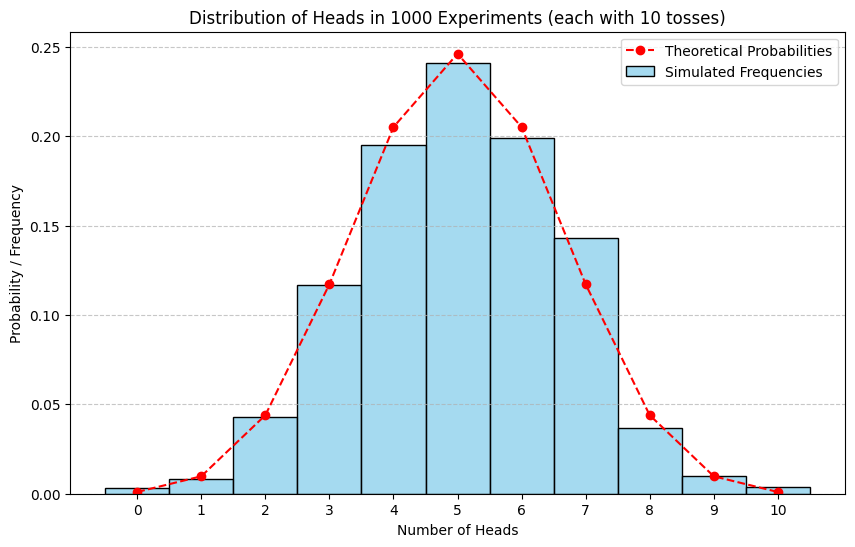

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(heads_in_experiments, bins=np.arange(-0.5, tosses_per_experiment + 1.5, 1), kde=False, stat='probability', color='skyblue', edgecolor='black', label='Simulated Frequencies')

# Calculate theoretical probabilities for binomial distribution
x = np.arange(0, tosses_per_experiment + 1)
plt.plot(x, binom.pmf(x, n=tosses_per_experiment, p=prob_heads), 'ro--', label='Theoretical Probabilities')

plt.title(f'Distribution of Heads in {num_experiments} Experiments (each with {tosses_per_experiment} tosses)')
plt.xlabel('Number of Heads')
plt.ylabel('Probability / Frequency')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Finally, we calculate theoretical probabilities for different scenarios using `scipy.stats.binom` for a specified number of tosses.

In [24]:
# --- 4. Compute Theoretical Probabilities ---
num_tosses_for_prob = 10 # Number of tosses for probability calculations

# Probability of getting exactly 5 heads
num_heads_desired = 5
probability_exact = binom.pmf(k=num_heads_desired, n=num_tosses_for_prob, p=prob_heads)
print(f"\n--- Theoretical Probabilities (for {num_tosses_for_prob} tosses) ---")
print(f"P(exactly {num_heads_desired} heads): {probability_exact:.4f}")

# Probability of getting at most 3 heads
num_heads_at_most = 3
probability_at_most = binom.cdf(k=num_heads_at_most, n=num_tosses_for_prob, p=prob_heads)
print(f"P(at most {num_heads_at_most} heads): {probability_at_most:.4f}")

# Probability of getting at least 7 heads
num_heads_at_least = 7
probability_at_least = 1 - binom.cdf(k=num_heads_at_least - 1, n=num_tosses_for_prob, p=prob_heads)
print(f"P(at least {num_heads_at_least} heads): {probability_at_least:.4f}")


--- Theoretical Probabilities (for 10 tosses) ---
P(exactly 5 heads): 0.2461
P(at most 3 heads): 0.1719
P(at least 7 heads): 0.1719
